In [ ]:
# Top 10 Users based on Most Number of Tweets
# Time Series of their tweet activity
# Top 10 users based on Most Number of Followers
# Time Series of their tweet activity 
# For each of these categories: Word Clouds of Bio

In [ ]:
!pip install tweet-preprocessor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS 
import plotly.express as px     
from collections import Counter 
import collections
import preprocessor as p
import seaborn as sns
import datetime
import re

In [ ]:
def make_timeseries(df,user):
  # print((user_df1[user_df1["user.id_str"] == user]))
  user_name = np.array(df[df["user.id_str"] == user]["user.name"])[0]
  print("Twitter Activity for userId =  ",user," username = ",user_name)
  temp = df[df["user.id_str"] == user]
  temp['date'] = temp.apply(lambda x: x['created_at'][:-17],axis=1)
  frequencies = temp['date'].value_counts()
  d = frequencies.reset_index()
  # print(temp['date'])
  # print(d)
  time_ = []
  for s_time in d['index']:
    time = datetime.datetime.strptime(s_time,'%a %b %d %H')+datetime. timedelta(hours = 5, minutes = 30)
    time= time.replace(year=2021)
    #time_.append('2021'+time[4:])
    time_.append(time)
    # print(time)
  d['Time'] = time_
  d = d.rename(columns={'date':'tweets'})
  d= d.sort_values(by=['Time'])
  # print(d)
  fig = px.line(d,x='Time',y='tweets',range_x=['2021-03-13','2021-04-01'])
  fig.show()

# make_timeseries(1334740513816080388)

## **Twitter Activity & User Engagement Pattern : Punjabi Tweets**

In [ ]:
punjabi_data = pd.read_csv('/content/drive/MyDrive/PSOSMData/PunjabiData.csv')
punjabi_data

,Unnamed: 0,_id,display_text_range,favorite_count,extended_entities.media,full_text,possibly_sensitive,retweet_count,entities.hashtags,entities.user_mentions,created_at,user.location,user.geo_enabled,user.verified,user.followers_count,user.id_str,user.following,user.created_at,user.description,user.protected,user.screen_name,user.name,user.statuses_count,user.favourites_count,user.friends_count,truncated,in_reply_to_user_id,retweeted,coordinates,lang
0,8,60584ce82d4d1903ac9d90d2,"[0,140]",0.0,NaN,RT @Drkhinda2: ਅਸੀ ਜ਼ਰੂਰ ਕਿਹੰਦੇ ਹਾਂ — “ ਭਗਤ ਸਿ...,NaN,29,[],"[{""screen_name"":""Drkhinda2"",""name"":""Dr khinda ...",Mon Mar 22 07:52:39 +0000 2021,false,False,False,775.0,1363552933250490373,NaN,Sun Feb 21 18:15:45 +0000 2021,Proud भारतीय:Doctorate in Mgt Oxford Uk 🇬🇧 Eco...,False,Drkhinda2,Dr khinda ( back up a/c),7765.0,906.0,1089.0,False,NaN,False,NaN,pa
1,30,60584ce82d4d1903ac9d90e8,"[0,74]",0.0,NaN,ਕਿਸਾਨ ਮਜ਼ਦੂਰ ਏਕਤਾ ਜ਼ਿੰਦਾਬਾਦ \n#23March_किसानों...,False,0,"[{""text"":""23March_किसानों_के_साथ"",""indices"":[2...",[],Mon Mar 22 07:51:00 +0000 2021,UAE,True,False,1614.0,1334457818800381954,NaN,Thu Dec 03 11:22:05 +0000 2020,ਟਵਿੱਟਰ 'ਤੇ ਆਏ ਹਾਂ ਕਿਸਾਨੀ ਸੰਘਰਸ਼ & ਆਪਣੇ ਹੱਕਾਂ ਲ...,False,Sangha_jass11,ਸੰਘਿਆਂ ਦਾ ਜੱਸ ( ਅੰਦੋਲਨਜੀਵੀ ),3987.0,544.0,1620.0,False,NaN,False,NaN,pa
2,36,60584ce82d4d1903ac9d90ee,"[0,140]",0.0,NaN,RT @LakhbirGill17: ਸਾਡਾ ਉਹ ਸ਼ਹੀਦ ਜਿਸ ਦੀ ਕੁਰਬਾਨ...,NaN,2,[],"[{""screen_name"":""LakhbirGill17"",""name"":""🍃ਕਿਸਾਨ...",Mon Mar 22 07:50:44 +0000 2021,𝑴𝒐𝒓𝒊𝒏𝒅𝒂 (𝑷𝒖𝒏𝒋𝒂𝒃),False,False,844.0,1362710836125437952,NaN,Fri Feb 19 10:30:00 +0000 2021,ਅਣਖੀਲੇ ਪੰਜਾਬੀ,False,Kamal99024,🌹𝑲𝒂𝒎𝒂𝒍 𝑪𝒉𝒊𝒃𝒃𝒆𝒓🌹,860.0,1604.0,1322.0,False,NaN,False,NaN,pa
3,50,60584ce82d4d1903ac9d90fc,"[0,140]",0.0,NaN,RT @kirpan94917652: ਮਨ ਦਾ ਟਿੱਕਣਾ ਵੀ ਬਹੁਤ ਜ਼ਰੂਰ...,NaN,71,"[{""text"":""23March_किसानों_के_साथ"",""indices"":[8...","[{""screen_name"":""kirpan94917652"",""name"":""ਕ੍ਰਿਪ...",Mon Mar 22 07:49:48 +0000 2021,false,False,False,115.0,3228125617,NaN,Wed May 27 09:58:42 +0000 2015,false,False,anmol6633,anmol singh,12544.0,6379.0,288.0,False,NaN,False,NaN,pa
4,61,60584ce82d4d1903ac9d9107,"[0,140]",0.0,NaN,RT @preetjaikaur: ਜੇਕਰ ਕਰੋਨਾ ਏਨਾ ਖ਼ਤਰਨਾਕ ਹੈ ਤਾ...,NaN,10,[],"[{""screen_name"":""preetjaikaur"",""name"":""ᴊᴀiᴘʀᴇᴇ...",Mon Mar 22 07:49:15 +0000 2021,"Phagwara, India",True,False,204.0,1335604646044266497,NaN,Sun Dec 06 15:19:44 +0000 2020,🌟 ਬਾਗੀ ਤਬੀਅਤਾਂ ਦਾ ਮਾਲਿਕ 🌟,False,iBabbuSaini,ＢＥＩＭＡＡＮ 🖤,454.0,876.0,378.0,False,NaN,False,NaN,pa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154372,1109828,606590bf2d4d191a49d09ad5,"[0,140]",0.0,NaN,RT @sohi45554321: ਕਿਸਾਨ ਮਜਦੂਰ ਏਕਤਾ ਜਿੰਦਾਬਾਦ #...,NaN,24,"[{""text"":""FarmersProtest"",""indices"":[45,60]},{...","[{""screen_name"":""sohi45554321"",""id_str"":""13718...",Wed Mar 24 08:43:50 +0000 2021,false,False,False,412.0,1274036782674272256,NaN,Fri Jun 19 17:50:35 +0000 2020,no farmers no food 🙏🙏🙏,False,Kulwind73175831,Kulwinder,12387.0,4046.0,603.0,False,NaN,False,NaN,pa
154373,1109835,606590bf2d4d191a49d09adc,"[0,82]",0.0,NaN,RT @PawanpreetkaurG: ਅੱਜ ਦਾ ਹੈਸ਼ਟੈਗ🙏 (21/03/21...,NaN,63,"[{""text"":""BoycottBJP_4Farmers"",""indices"":[49,6...","[{""screen_name"":""PawanpreetkaurG"",""id_str"":""13...",Wed Mar 24 08:34:23 +0000 2021,false,False,False,8.0,1341998266104201217,NaN,Thu Dec 24 06:45:24 +0000 2020,o proud to B a sikh,False,sonyraikot221g1,punjabi warrior,422.0,267.0,72.0,False,NaN,False,NaN,pa
154374,1109838,606590bf2d4d191a49d09adf,"[0,140]",0.0,NaN,RT @sohi45554321: ਕਿਸਾਨ ਮਜਦੂਰ ਏਕਤਾ ਜਿੰਦਾਬਾਦ #...,NaN,24,"[{""text"":""FarmersProtest"",""indices"":[45,60]},{...","[{""screen_name"":""sohi45554321"",""id_str"":""13718...",Wed Mar 24 08:33:29 +0000 2021,"Patiala, India",False,False,953.0,1358637816209498113,NaN,Mon Feb 08 04:44:44 +0000 2021,"ਨਾਨਕ ਨਾਮ ਚੜ੍ਹਦੀ ਕਲਾ, ਤੇਰੇ ਭਾਣੇ ਸਰਬੱਤ ਦਾ ਭਲਾ",False,2_laddi,Laddi Jawandha 2%wale,12285.0,12913.0,2036.0,False,NaN,False,NaN,pa
154375,1109841,606590bf2d4d191a49d09ae2,"[0,113]",0.0,NaN,RT @SukhdevSingh_: 

In [ ]:
user_df3 = punjabi_data[["_id","user.id_str",	"created_at","user.followers_count","user.name","user.statuses_count","user.description"]]
user_df3

,_id,user.id_str,created_at,user.followers_count,user.name,user.statuses_count,user.description
0,60584ce82d4d1903ac9d90d2,1363552933250490373,Mon Mar 22 07:52:39 +0000 2021,775.0,Dr khinda ( back up a/c),7765.0,Proud भारतीय:Doctorate in Mgt Oxford Uk 🇬🇧 Eco...
1,60584ce82d4d1903ac9d90e8,1334457818800381954,Mon Mar 22 07:51:00 +0000 2021,1614.0,ਸੰਘਿਆਂ ਦਾ ਜੱਸ ( ਅੰਦੋਲਨਜੀਵੀ ),3987.0,ਟਵਿੱਟਰ 'ਤੇ ਆਏ ਹਾਂ ਕਿਸਾਨੀ ਸੰਘਰਸ਼ & ਆਪਣੇ ਹੱਕਾਂ ਲ...
2,60584ce82d4d1903ac9d90ee,1362710836125437952,Mon Mar 22 07:50:44 +0000 2021,844.0,🌹𝑲𝒂𝒎𝒂𝒍 𝑪𝒉𝒊𝒃𝒃𝒆𝒓🌹,860.0,ਅਣਖੀਲੇ ਪੰਜਾਬੀ
3,60584ce82d4d1903ac9d90fc,3228125617,Mon Mar 22 07:49:48 +0000 2021,115.0,anmol singh,12544.0,false
4,60584ce82d4d1903ac9d9107,1335604646044266497,Mon Mar 22 07:49:15 +0000 2021,204.0,ＢＥＩＭＡＡＮ 🖤,454.0,🌟 ਬਾਗੀ ਤਬੀਅਤਾਂ ਦਾ ਮਾਲਿਕ 🌟
...,...,...,...,...,...,...,...
154372,606590bf2d4d191a49d09ad5,1274036782674272256,Wed Mar 24 08:43:50 +0000 2021,412.0,Kulwinder,12387.0,no farmers no food 🙏🙏🙏
154373,606590bf2d4d191a49d09adc,1341998266104201217,Wed Mar 24 08:34:23 +0000 2021,8.0,punjabi warrior,422.0,o proud to B a sikh
154374,606590bf2d4d191a49d09adf,1358637816209498113,Wed Mar 24 08:33:29 +0000 2021,953.0,Laddi Jawandha 2%wale,12285.0,"ਨਾਨਕ ਨਾਮ ਚੜ੍ਹਦੀ ਕਲਾ, ਤੇਰੇ ਭਾਣੇ ਸਰਬੱਤ ਦਾ ਭਲਾ"
154375,606590bf2d4d191a49d09ae2,1335138280103313408,Wed Mar 24 08:24:32 +0000 2021,6.0,binder bhullar,76.0,Stand with farmers 👳🏼✊🏼


In [ ]:
len(np.unique(user_df3['user.id_str']))

7274

In [ ]:
# The user dataframe based on number of tweets in this dataset 
n_tweets_users = user_df3.groupby(by=["user.id_str"]).size()
n_tweets_users
n_tweets_users.sort_values(ascending=False,inplace=True)
print(n_tweets_users)
user_df31 = pd.DataFrame({'cnt':n_tweets_users})
top_users_ntweets = user_df31.head(10)
top_users_ntweets
np.array(top_users_ntweets.index)
top_10_users_ntweets = np.array(top_users_ntweets.index)[:10]
top_10_users_ntweets

user.id_str
1274036782674272256    1844
1368923307249139716    1837
1334144412159340545    1634
2856851646             1441
1440041130             1373
                       ... 
1326319415865040896       1
1326140189119447040       1
1326139217584353280       1
1325440959979679744       1
6398212                   1
Length: 7274, dtype: int64


array([1274036782674272256, 1368923307249139716, 1334144412159340545,
                2856851646,          1440041130,          2926452582,
       1334692269371191297, 1358637816209498113, 1334740513816080388,
       1333437476568895488])

In [ ]:
#The user dataframe based on number of folowers in this datase
new_df = user_df3.groupby(by=["user.id_str"]).max()
new_df
new_df.sort_values(by=["user.followers_count"],ascending=False,inplace=True)
print(new_df)
top_users_nfollowers = new_df.head(10)
top_users_nfollowers
np.array(top_users_nfollowers.index)
top_10_users_nfollowers = np.array(top_users_nfollowers.index)
top_10_users_nfollowers

                                          _id  ...                                   user.description
user.id_str                                    ...                                                   
1016786527           605885892d4d1903aca88fdc  ...  'CHANGE' is the Goal. Social Media is my weapo...
222394250            6065904e2d4d191a49d0789f  ...  The Punjab Kesari Group's punjabi daily, Jag B...
73353129             605866c82d4d1903aca2ba40  ...  President, Delhi Sikh Gurdwara Management comm...
2713734486           606590a32d4d191a49d09482  ...  PTC Network is world’s most popular and larges...
2359140223           606586822d4d191a49ceb3bd  ...  Political Strategist/Advisor || Politician || ...
...                                       ...  ...                                                ...
1332770823145463815  605860422d4d1903aca18905  ...                                      mandeep singh
1332195895111159808  6065869b2d4d191a49cebc9b  ...      NSUI President (Lok sabha 

array([         1016786527,           222394250,            73353129,
                2713734486,          2359140223,          3186496375,
                  54827721, 1332938946620268546,          3186970225,
                 493941377])

In [ ]:
for user in top_10_users_ntweets:
  print(user)
  make_timeseries(user_df3,user)

1274036782674272256
Twitter Activity for userId =   1274036782674272256  username =  Kulwinder


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1368923307249139716
Twitter Activity for userId =   1368923307249139716  username =  Harprit kaur


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1334144412159340545
Twitter Activity for userId =   1334144412159340545  username =  Satvir Singh


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2856851646
Twitter Activity for userId =   2856851646  username =  Harry Dhaliwal


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1440041130
Twitter Activity for userId =   1440041130  username =  ਲੋਹੇ ਦਾ ਬੰਦਾ


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2926452582
Twitter Activity for userId =   2926452582  username =  Parmpal Singh


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1334692269371191297
Twitter Activity for userId =   1334692269371191297  username =  ਕਮਲਜੀਤ ਸਿੰਘ


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1358637816209498113
Twitter Activity for userId =   1358637816209498113  username =  Laddi Jawandha 2%wale


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1334740513816080388
Twitter Activity for userId =   1334740513816080388  username =  Baldev Attal


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1333437476568895488
Twitter Activity for userId =   1333437476568895488  username =  𝐔𝐭𝐭𝐚𝐦 𝐒𝐢𝐧𝐠𝐡


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for user in top_10_users_nfollowers:
  print(user)
  make_timeseries(user_df3,user)

1016786527
Twitter Activity for userId =   1016786527  username =  Aarti


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



222394250
Twitter Activity for userId =   222394250  username =  Jagbani


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



73353129
Twitter Activity for userId =   73353129  username =  Manjinder Singh Sirsa


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2713734486
Twitter Activity for userId =   2713734486  username =  PTC Punjabi


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2359140223
Twitter Activity for userId =   2359140223  username =  जॉर्ज कुरियन


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3186496375
Twitter Activity for userId =   3186496375  username =  Shiromani Akali Dal


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



54827721
Twitter Activity for userId =   54827721  username =  YesPunjab-Punjabi (For English Follow @yespunjab)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1332938946620268546
Twitter Activity for userId =   1332938946620268546  username =  Tractor2ਟਵਿੱਟਰ


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3186970225
Twitter Activity for userId =   3186970225  username =  Jin sodhi


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



493941377
Twitter Activity for userId =   493941377  username =  India Resists


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def get_punjabi_wordcloud(users):
  s = ""
  for user in users:
    user_desc = np.array(user_df3[user_df3["user.id_str"] == user]["user.description"])[0]
    
    val = str(user_desc)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    tokens = [i for i in tokens if not i.startswith("http")]
    s += " ".join(tokens)+" "
  print(s)
  wordcloud = WordCloud(font_path='/content/drive/MyDrive/PSOSMData/Bulara_Thin_Border_Body.ttf',width = 800, height = 800,
              background_color ='white',
              stopwords = stopwords,
              min_font_size = 10).generate(s)

  # plot the WordCloud image                       
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)    
  plt.show()
  

no farmers no food 🙏🙏🙏 only join for kissan protest 💚👏🚜🚜🧕 back up account। ਹੱਕ ਤੇ ਸੱਚ ਦੀ ਲੜਾਈ ਖਾਤਾ ਸਿਰਫ ਕਿਸਾਨੀ ਸੰਘਰਸ਼ ਨਾਲ ਜੁੜਨ ਲਈ ਬਣਾਇਆ ਗਿਆ. follow ਕਰਕੇ unfollow ਕਰਨ ਆਲੇ ਫੋਕੇ ਕਿਸਾਨ ਹਿਮਾਇਤੀ ਨਾ ਈ ਖੇਚਲ ਕਰਨ..ਏਥੇ ਸਿਰਫ ਮੋਰਚੇ ਲਈ ਆਏ ਆ. ਕਿਸਾਨ ਮਜਦੂਰ ਏਕਤਾ ਜਿੰਦਾਬਾਦ i am farmer and i proud to be a farmer....majha block... pb06 wale ਅੰਦੋਲਨਜੀਵੀ ਆਪਣੇ ਹੱਕਾ ਲਈ ਤਾਂ ਅਸੀ ਅੱਤਵਾਦੀ ਵੀ ਬਣਾ ਗੇ ਅੰਦੋਲਨ ਜੀਵੀ ਕਿੱਡੀ ਕ ਗੱਲ ਆ ਖੇਤਾਂ ਦਾ ਪੁੱਤ. follow ਨਪੋ ਜੀ 👆👆🏻👆🏽👆🏿 data scientist, artificial intelligence, natural lover, dill to punjabi ਅਨਾਜ਼ ਖਾਣ ਵਾਲੇ ਕਿਸਾਨਾਂ ਨਾਲ ਤੇ ਗੋਹਾ ਖਾਣ ਵਾਲੇ ਵਿਰੋਧ ਚ🤣😂 ਨਾਨਕ ਨਾਮ ਚੜ੍ਹਦੀ ਕਲਾ, ਤੇਰੇ ਭਾਣੇ ਸਰਬੱਤ ਦਾ ਭਲਾ use hashtag of kisan ekta morcha #farmersprotest use daily hashtag released with every tweet, retweet, comments and reply. beware duplicate if u follow me, don't expect i will follow back u because i don't like follow-2 but i retweet on everyone's post if post is related to agitaion + hashtag tq 


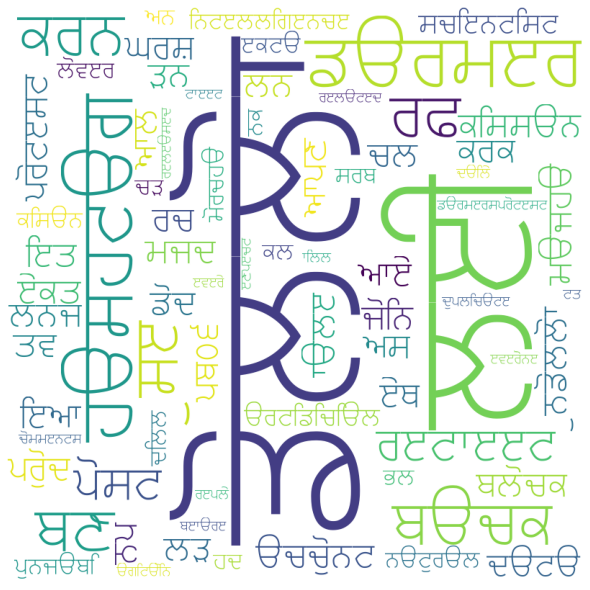

In [ ]:
get_punjabi_wordcloud(top_10_users_ntweets)

'change' is the goal. social media is my weapon. enriching journey with aap national, social media team. be a part of changing 1 life, its worth it ! the punjab kesari group's punjabi daily, jag bani was launched on july 21, 1978. president, delhi sikh gurdwara management committee | national spokesman, @akali_dal_ | humbly and fearlessly raising my voice on righteous issues ptc network is world’s most popular and largest punjabi tv network. *official account* political strategist/advisor || politician || indian national congress || organisation building || 𝐑𝐄𝐓𝐖𝐄𝐄𝐓𝐒 𝐀𝐑𝐄 𝐍𝐎𝐓 𝐄𝐍𝐃𝐎𝐑𝐒𝐄𝐌𝐄𝐍𝐓𝐒 shiromani akali dal | by, of & for the people of punjab | est. 14 dec 1920, oldest regional democratic party by indians | philosophy: #rajnahisewa #journalist #columnist #writer #editor at a #news and #entertainment site on #punjab #india tractor to twitter is a campaign to support protesting farmers on social media against the farm bills. telegram channel realtor we, the misled people of india...आंदोलन

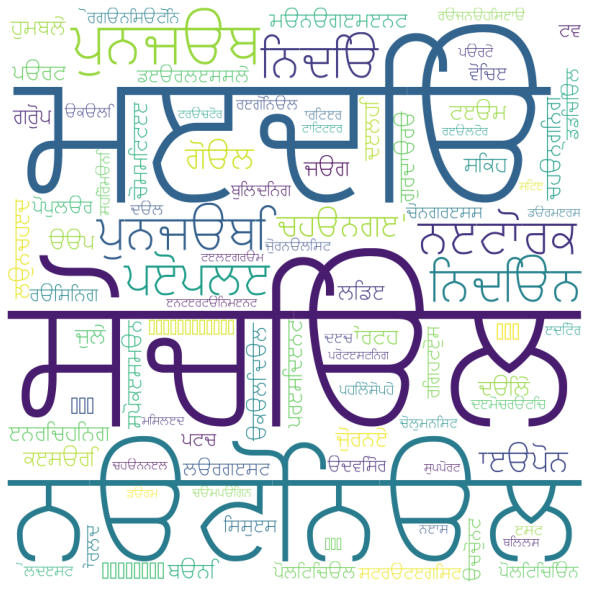

In [ ]:
get_punjabi_wordcloud(top_10_users_nfollowers)

## **Twitter Activity & User Engagement Pattern : English Tweets**

In [ ]:
eng_data = pd.read_csv('/content/drive/MyDrive/PSOSMData/EnglishData.csv')
eng_data

,Unnamed: 0,_id,display_text_range,favorite_count,extended_entities.media,full_text,possibly_sensitive,retweet_count,entities.hashtags,entities.user_mentions,created_at,user.location,user.geo_enabled,user.verified,user.followers_count,user.id_str,user.following,user.created_at,user.description,user.protected,user.screen_name,user.name,user.statuses_count,user.favourites_count,user.friends_count,truncated,in_reply_to_user_id,retweeted,coordinates,lang
0,0,60584ce82d4d1903ac9d90ca,"[0,279]",0.0,"[{""id"":1373905569816346600,""id_str"":""137390556...","#23March_किसानों_के_साथ appeal to people, not ...",False,0,"[{""text"":""23March_किसानों_के_साथ"",""indices"":[0...",[],Mon Mar 22 07:53:10 +0000 2021,false,False,False,54.0,2333913841,NaN,Sat Feb 08 18:39:28 +0000 2014,false,False,1st_being_human,JS,18.0,43.0,578.0,False,NaN,False,NaN,en
1,1,60584ce82d4d1903ac9d90cb,"[0,35]",0.0,NaN,#FarmersProtest is still happening!,NaN,0,"[{""text"":""FarmersProtest"",""indices"":[0,15]}]",[],Mon Mar 22 07:53:10 +0000 2021,false,False,False,7.0,904007148568403971,NaN,Sat Sep 02 15:44:34 +0000 2017,false,False,dhanoa_jasmine,Jasmine,271.0,104.0,0.0,False,NaN,False,NaN,en
2,2,60584ce82d4d1903ac9d90cc,"[0,139]",0.0,NaN,RT @Drkhinda2: #FarmersProtest \n-ਗਰਮੀਆਂ ਦੀਆਂ ...,NaN,203,"[{""text"":""FarmersProtest"",""indices"":[15,30]}]","[{""screen_name"":""Drkhinda2"",""name"":""Dr khinda ...",Mon Mar 22 07:53:06 +0000 2021,false,False,False,775.0,1363552933250490373,NaN,Sun Feb 21 18:15:45 +0000 2021,Proud भारतीय:Doctorate in Mgt Oxford Uk 🇬🇧 Eco...,False,Drkhinda2,Dr khinda ( back up a/c),7765.0,906.0,1089.0,False,NaN,False,NaN,en
3,3,60584ce82d4d1903ac9d90cd,"[0,140]",0.0,NaN,RT @Drkhinda2: #FarmersProtest BJP Health Mini...,NaN,129,"[{""text"":""FarmersProtest"",""indices"":[15,30]}]","[{""screen_name"":""Drkhinda2"",""name"":""Dr khinda ...",Mon Mar 22 07:52:58 +0000 2021,false,False,False,775.0,1363552933250490373,NaN,Sun Feb 21 18:15:45 +0000 2021,Proud भारतीय:Doctorate in Mgt Oxford Uk 🇬🇧 Eco...,False,Drkhinda2,Dr khinda ( back up a/c),7765.0,906.0,1089.0,False,NaN,False,NaN,en
4,6,60584ce82d4d1903ac9d90d0,"[0,279]",0.0,"[{""id"":1373905487981211600,""id_str"":""137390548...","#23March_किसानों_के_साथ appeal to people, not ...",False,0,"[{""text"":""23March_किसानों_के_साथ"",""indices"":[0...",[],Mon Mar 22 07:52:51 +0000 2021,false,False,False,54.0,2333913841,NaN,Sat Feb 08 18:39:28 +0000 2014,false,False,1st_being_human,JS,18.0,43.0,578.0,False,NaN,False,NaN,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604370,1109827,606590bf2d4d191a49d09ad4,"[0,277]",0.0,NaN,🙏🏻 I support farmers 🙏🏻\n\n#farmersprotest #st...,NaN,0,"[{""text"":""farmersprotest"",""indices"":[25,40]},{...",[],Wed Mar 24 08:46:37 +0000 2021,false,True,False,20.0,1037527400,NaN,Wed Dec 26 16:40:12 +0000 2012,false,False,Gurpreetsing99,Gurpreet Singh,1193.0,948.0,53.0,False,NaN,False,NaN,en
604371,1109830,606590bf2d4d191a49d09ad7,"[0,140]",0.0,NaN,"RT @CubeReports: Old man back flips, stunned ...",NaN,56,"[{""text"":""sundayvibes"",""indices"":[89,101]},{""t...","[{""screen_name"":""CubeReports"",""id_str"":""135988...",Wed Mar 24 08:37:59 +0000 2021,false,False,False,50.0,1335582071578910720,NaN,Sun Dec 06 13:49:54 +0000 2020,false,False,PedroAl94942723,Pedro Alves,44.0,41.0,82.0,False,NaN,False,NaN,en
604372,1109832,606590bf2d4d191a49d09ad9,"[0,140]",0.0,NaN,RT @rumpannu: If they can do this for us then ...,NaN,31,[],"[{""screen_name"":""rumpannu"",""id_str"":""136147804...",Wed Mar 24 08:36:01 +0000 2021,false,False,False,89.0,1358087425315147783,NaN,Sat Feb 06 16:17:50 +0000 2021,"Atheist\nPatriotic , feminist , environmental ...",False,AdityaT21413249,DR. ADITYA THAKUR,5407.0,3700.0,402.0,False,NaN,False,NaN,en
604373,1109834,606590bf2d4d191a49d09adb,"[0,140]",0.0,NaN,"RT @Mkchoudhary97: On This day Bhagat Singh, S...",NaN,56,"[{""text"":""BhagatSingh"",""indices"":[106,118]},{""...","[{""screen_nam

In [ ]:
#The dataframe containing just user ids and the follower count and tweet.createdAt and user,description
user_df1 = eng_data[["_id","user.id_str",	"created_at","user.followers_count","user.name","user.statuses_count","user.description"]]
user_df1

,_id,user.id_str,created_at,user.followers_count,user.name,user.statuses_count,user.description
0,60584ce82d4d1903ac9d90ca,2333913841,Mon Mar 22 07:53:10 +0000 2021,54.0,JS,18.0,false
1,60584ce82d4d1903ac9d90cb,904007148568403971,Mon Mar 22 07:53:10 +0000 2021,7.0,Jasmine,271.0,false
2,60584ce82d4d1903ac9d90cc,1363552933250490373,Mon Mar 22 07:53:06 +0000 2021,775.0,Dr khinda ( back up a/c),7765.0,Proud भारतीय:Doctorate in Mgt Oxford Uk 🇬🇧 Eco...
3,60584ce82d4d1903ac9d90cd,1363552933250490373,Mon Mar 22 07:52:58 +0000 2021,775.0,Dr khinda ( back up a/c),7765.0,Proud भारतीय:Doctorate in Mgt Oxford Uk 🇬🇧 Eco...
4,60584ce82d4d1903ac9d90d0,2333913841,Mon Mar 22 07:52:51 +0000 2021,54.0,JS,18.0,false
...,...,...,...,...,...,...,...
604370,606590bf2d4d191a49d09ad4,1037527400,Wed Mar 24 08:46:37 +0000 2021,20.0,Gurpreet Singh,1193.0,false
604371,606590bf2d4d191a49d09ad7,1335582071578910720,Wed Mar 24 08:37:59 +0000 2021,50.0,Pedro Alves,44.0,false
604372,606590bf2d4d191a49d09ad9,1358087425315147783,Wed Mar 24 08:36:01 +0000 2021,89.0,DR. ADITYA THAKUR,5407.0,"Atheist\nPatriotic , feminist , environmental ..."
604373,606590bf2d4d191a49d09adb,1373087960250216448,Wed Mar 24 08:35:16 +0000 2021,490.0,🌹🥀✍️Avani✍️🥀🌹,2557.0,💞💚Social Activities Main... 💚💞 👮🕴जय जवान🌾 👳जय ...


In [ ]:
len(np.unique(user_df1['user.id_str']))

63687

In [ ]:
# The user dataframe based on number of tweets in this dataset 
n_tweets_users = user_df1.groupby(by=["user.id_str"]).size()
n_tweets_users
n_tweets_users.sort_values(ascending=False,inplace=True)
user_df11 = pd.DataFrame({'cnt':n_tweets_users})
top_users_ntweets = user_df11.head(10)
top_users_ntweets
np.array(top_users_ntweets.index)
top_10_users_ntweets = np.array(top_users_ntweets.index)[:10]
top_10_users_ntweets

array([1334740513816080388,          1440041130,          2926452582,
       1333451844018847755,           361559327, 1367830551176962052,
       1354532795847073796,  872085660886282240,          3182979241,
       1328238070358044673])

In [ ]:
#The user dataframe based on number of folowers in this datase
new_df = user_df1.groupby(by=["user.id_str"]).max()
new_df
new_df.sort_values(by=["user.followers_count"],ascending=False,inplace=True)
top_users_nfollowers = new_df.head(10)
top_users_nfollowers
np.array(top_users_nfollowers.index)
top_10_users_nfollowers = np.array(top_users_nfollowers.index)
top_10_users_nfollowers

array([ 37034483, 134758540,  39240673,  36327407,  19897138,  18071358,
         6509832,  39743812,  38647512,  41364508])

In [ ]:
for user in top_10_users_ntweets:
  make_timeseries(user_df1,user)

Twitter Activity for userId =   1334740513816080388  username =  Baldev Attal


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Twitter Activity for userId =   1440041130  username =  ਲੋਹੇ ਦਾ ਬੰਦਾ


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Twitter Activity for userId =   2926452582  username =  Parmpal Singh


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Twitter Activity for userId =   1333451844018847755  username =  ਸ਼ੇਰ ਸਿੰਘ


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Twitter Activity for userId =   361559327  username =  Amar


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Twitter Activity for userId =   1367830551176962052  username =  Ambedkarwadi AK


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Twitter Activity for userId =   1354532795847073796  username =  Theinactiveactivist


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Twitter Activity for userId =   872085660886282240  username =  Jaz 🇨🇦🌾ਗਰਮ ਖਿਆਲੀ


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Twitter Activity for userId =   3182979241  username =  DAUGHTER OF FARMER


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Twitter Activity for userId =   1328238070358044673  username =  Jaskaran


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for user in top_10_users_nfollowers:
  print(user)
  make_timeseries(user_df1,user)

37034483
Twitter Activity for userId =   37034483  username =  NDTV


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



134758540
Twitter Activity for userId =   134758540  username =  The Times Of India


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



39240673
Twitter Activity for userId =   39240673  username =  ABP News


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



36327407
Twitter Activity for userId =   36327407  username =  Hindustan Times


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



19897138
Twitter Activity for userId =   19897138  username =  IndiaToday


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



18071358
Twitter Activity for userId =   18071358  username =  Zee News English


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



6509832
Twitter Activity for userId =   6509832  username =  News18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



39743812
Twitter Activity for userId =   39743812  username =  Economic Times


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



38647512
Twitter Activity for userId =   38647512  username =  The Indian Express


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



41364508
Twitter Activity for userId =   41364508  username =  VISHAL DADLANI


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Making English wordcloud 
stopwords = set(STOPWORDS)
def get_eng_wordcloud(users):
  s = ""
  for user in users:
    user_desc = np.array(user_df1[user_df1["user.id_str"] == user]["user.description"])[0]
    
    val = str(user_desc)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    tokens = [i for i in tokens if not i.startswith("http")]
    s += " ".join(tokens)+" "
  print(s)
  wordcloud = WordCloud(width = 800, height = 800,
              background_color ='white',
              stopwords = stopwords,
              min_font_size = 10).generate(s)

  # plot the WordCloud image                       
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
    
  plt.show()

use hashtag of kisan ekta morcha #farmersprotest use daily hashtag released with every tweet, retweet, comments and reply. beware duplicate ਅੰਦੋਲਨਜੀਵੀ ਆਪਣੇ ਹੱਕਾ ਲਈ ਤਾਂ ਅਸੀ ਅੱਤਵਾਦੀ ਵੀ ਬਣਾ ਗੇ ਅੰਦੋਲਨ ਜੀਵੀ ਕਿੱਡੀ ਕ ਗੱਲ ਆ ਖੇਤਾਂ ਦਾ ਪੁੱਤ. follow ਨਪੋ ਜੀ 👆👆🏻👆🏽👆🏿 data scientist, artificial intelligence, natural lover, dill to punjabi just to support farmer "i always like to look on the optimistic side of life, but i am realistic enough to know that life is a complex matter.” —walt disney injustice anywhere is a threat to justice everywhere-martin luther king. my education for my society. believe in human rights civil rights! love for humanity 🙏❤️🙏 a tweeter who tweets on twitter! #sidharthshukla stan💕 @isidhumoosewala 🌷 #neverforget1984 ✊ follow official page of👉👉👉@kisanektamorcha i support farmers✍ ਜੀਅ ਕਰਦਾ ਨਾਨਕ ਦੀਆਂ ਨਾਵਲਾਂ 'ਚ ਕਿਧਰੇ ਖੋ ਜਾਵਾਂ!! 


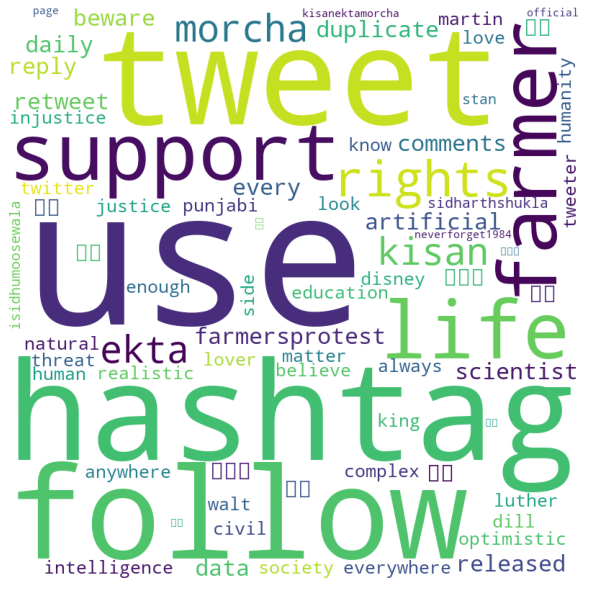

In [ ]:
get_eng_wordcloud(top_10_users_ntweets)

breaking news alerts from india. instagram: youtube: news. views. analysis. conversations. india’s no.1 digital news destination, world’s largest-selling english newspaper - a times internet limited product follow for latest news alerts from india one of india's largest media companies. latest news from around the world. retweets are not endorsements brings you news breaks: exclusive political, entertainment, sports insight, unbiased-nonaligned. we are also on instagram : brings latest news with 360 degree coverage across all genres! follow us on instagram: lightning fast alerts, #breakingnews from india and the world. india's no. 1 business daily that brings you the latest #news updates | a times internet product the indian express brings to you latest news from india and the world, breaking round the clock. on telegram: for too long, you and i've been quiet..rise up! 


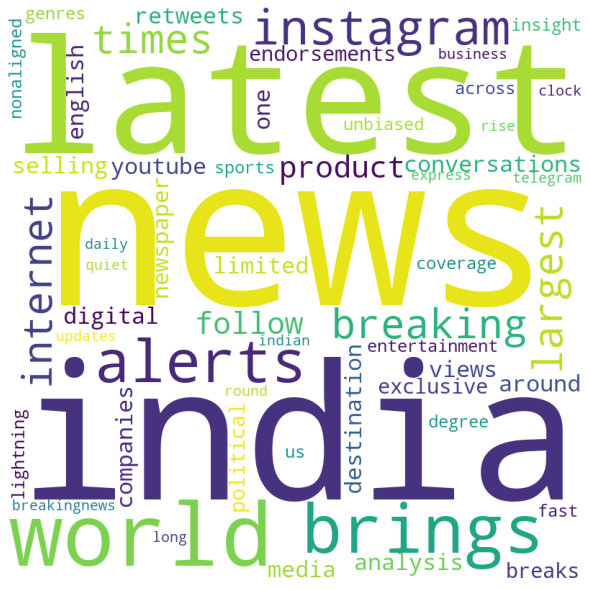

In [ ]:
get_eng_wordcloud(top_10_users_nfollowers)

## **Twitter Activity & User Engagement Pattern : Hindi Tweets**

In [ ]:
hindi_data = pd.read_csv('/content/drive/MyDrive/PSOSMData/HindiData.csv')
hindi_data

,Unnamed: 0,_id,display_text_range,favorite_count,extended_entities.media,full_text,possibly_sensitive,retweet_count,entities.hashtags,entities.user_mentions,created_at,user.location,user.geo_enabled,user.verified,user.followers_count,user.id_str,user.following,user.created_at,user.description,user.protected,user.screen_name,user.name,user.statuses_count,user.favourites_count,user.friends_count,truncated,in_reply_to_user_id,retweeted,coordinates,lang
0,4,60584ce82d4d1903ac9d90ce,"[0,128]",0.0,NaN,RT @jgrewal2k3: सोचता हूं साहब के झूठों पर एक ...,NaN,3,"[{""text"":""FarmersProtest"",""indices"":[113,128]}]","[{""screen_name"":""jgrewal2k3"",""name"":""ਸਰਾਭਾ"",""i...",Mon Mar 22 07:52:56 +0000 2021,false,False,False,27.0,1333686306694565888,NaN,Tue Dec 01 08:16:43 +0000 2020,false,False,DaljitS12514161,Daljit Singh,1448.0,1550.0,54.0,False,NaN,False,NaN,hi
1,7,60584ce82d4d1903ac9d90d1,"[0,140]",0.0,NaN,RT @KamakshSarathe: @narendramodi @dmnarsinghp...,NaN,34,[],"[{""screen_name"":""KamakshSarathe"",""name"":""Kamak...",Mon Mar 22 07:52:44 +0000 2021,false,False,False,26.0,924960670533091328,NaN,Mon Oct 30 11:26:23 +0000 2017,false,False,swarnkarnitin62,बेरोजगार nitin,1355.0,4542.0,56.0,False,NaN,False,NaN,hi
2,10,60584ce82d4d1903ac9d90d4,"[0,247]",0.0,NaN,भूलना मत साथियो हमारे किसान भाई अभी भी रास्ते ...,NaN,0,"[{""text"":""FarmersProtest100Days"",""indices"":[54...",[],Mon Mar 22 07:52:36 +0000 2021,india,False,False,122.0,87940715,NaN,Fri Nov 06 13:36:43 +0000 2009,अजीब जानवर है.. कितना भी खाए भूखा ही रहता है। ...,False,ShakaalTakle,Shakaal Ek Hindustani 🇮🇳💯🙏,2889.0,701.0,421.0,False,NaN,False,NaN,hi
3,13,60584ce82d4d1903ac9d90d7,"[0,274]",0.0,"[{""id"":1373905353146966000,""id_str"":""137390535...","मैं अपने देश के किसान के साथ हूँ, उनके संघर्ष ...",False,0,"[{""text"":""किसानआंदोलन"",""indices"":[97,109]},{""t...",[],Mon Mar 22 07:52:17 +0000 2021,"tejli village, yamuna nagar",True,False,34.0,1273221250517622789,NaN,Wed Jun 17 11:49:50 +0000 2020,SOCIAL WORKER जय जवान जय किसान\n\n#FarmersProtest,False,RinkuSa24306950,Rinku Sangwan🇮🇳🇮🇳🇮🇳,327.0,6921.0,235.0,False,NaN,False,NaN,hi
4,14,60584ce82d4d1903ac9d90d8,"[0,140]",0.0,NaN,RT @singh_harry07: राष्ट्रीय पक्षी मौर हे ये स...,NaN,17,"[{""text"":""23March_किसानों_के_साथ"",""indices"":[1...","[{""screen_name"":""singh_harry07"",""name"":""Singh""...",Mon Mar 22 07:52:13 +0000 2021,Canada,False,False,223.0,3576668052,NaN,Tue Sep 15 23:54:32 +0000 2015,Be a positive influence.💚🌾🚜,False,kaur_kaler,KaurKler,2265.0,1365.0,639.0,False,NaN,False,NaN,hi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228400,1109823,606590bf2d4d191a49d09ad0,"[0,139]",0.0,NaN,"RT @Rp_Sattawan: आप कब सही थे, इसे कोई याद नही...",NaN,34,"[{""text"":""किसान_विरोधी_NDA_सरकार"",""indices"":[9...","[{""screen_name"":""Rp_Sattawan"",""id_str"":""106668...",Wed Mar 24 08:54:17 +0000 2021,false,False,False,119.0,1246664438347747328,NaN,Sun Apr 05 05:03:19 +0000 2020,false,False,Phoolch08049751,Phoolchandra,15416.0,6807.0,56.0,False,NaN,False,NaN,hi
228401,1109829,606590bf2d4d191a49d09ad6,"[0,84]",1.0,"[{""display_url"":""pic.twitter.com/c2jvwQaEjx"",""...","बहाने ढूंढते हैं,\n निभाने वाले भी ,\nऔर छोड़न...",False,0,"[{""text"":""23March_किसानों_के_साथ"",""indices"":[6...",[],Wed Mar 24 08:40:00 +0000 2021,false,True,False,18.0,1352452914753794051,NaN,Fri Jan 22 03:08:10 +0000 2021,one 🌲 tree must plants in a years,False,Rajnees34027356,rajneshrajput,29.0,829.0,141.0,False,NaN,False,NaN,hi
228402,1109831,606590bf2d4d191a49d09ad8,"[0,169]",0.0,NaN,यूपी में ब्राह्मण ठोके जा रहे हैं और बिहार में...,NaN,0,"[{""text"":""4_साल_यूपी_बेहाल"",""indices"":[96,113]...",[],Wed Mar 24 08:36:36 +0000 2021,"Bhind, India",False,False,38.0,901977731939786752,NaN,Mon Aug 28 01:20:24 +0000 2017,झूठे लोगों को जवाब देना यही सबसे बड़ा धर्म है ...,False,JonuBaghel,Chambal Tiger's bhind (Jonubaghel),635.0,1141.0,138.0,False,NaN,False,NaN,hi
228403,1109833,606590bf2

In [ ]:
user_df2 = hindi_data[["_id","user.id_str",	"created_at","user.followers_count","user.name","user.statuses_count","user.description"]]
user_df2

,_id,user.id_str,created_at,user.followers_count,user.name,user.statuses_count,user.description
0,60584ce82d4d1903ac9d90ce,1333686306694565888,Mon Mar 22 07:52:56 +0000 2021,27.0,Daljit Singh,1448.0,false
1,60584ce82d4d1903ac9d90d1,924960670533091328,Mon Mar 22 07:52:44 +0000 2021,26.0,बेरोजगार nitin,1355.0,false
2,60584ce82d4d1903ac9d90d4,87940715,Mon Mar 22 07:52:36 +0000 2021,122.0,Shakaal Ek Hindustani 🇮🇳💯🙏,2889.0,अजीब जानवर है.. कितना भी खाए भूखा ही रहता है। ...
3,60584ce82d4d1903ac9d90d7,1273221250517622789,Mon Mar 22 07:52:17 +0000 2021,34.0,Rinku Sangwan🇮🇳🇮🇳🇮🇳,327.0,SOCIAL WORKER जय जवान जय किसान\n\n#FarmersProtest
4,60584ce82d4d1903ac9d90d8,3576668052,Mon Mar 22 07:52:13 +0000 2021,223.0,KaurKler,2265.0,Be a positive influence.💚🌾🚜
...,...,...,...,...,...,...,...
228400,606590bf2d4d191a49d09ad0,1246664438347747328,Wed Mar 24 08:54:17 +0000 2021,119.0,Phoolchandra,15416.0,false
228401,606590bf2d4d191a49d09ad6,1352452914753794051,Wed Mar 24 08:40:00 +0000 2021,18.0,rajneshrajput,29.0,one 🌲 tree must plants in a years
228402,606590bf2d4d191a49d09ad8,901977731939786752,Wed Mar 24 08:36:36 +0000 2021,38.0,Chambal Tiger's bhind (Jonubaghel),635.0,झूठे लोगों को जवाब देना यही सबसे बड़ा धर्म है ...
228403,606590bf2d4d191a49d09ada,1317496216431767552,Wed Mar 24 08:35:55 +0000 2021,29.0,Princepreet@email.com,994.0,respect woman


In [ ]:
len(np.unique(user_df2['user.id_str']))

66244

In [ ]:
# The user dataframe based on number of tweets in this dataset 
n_tweets_users = user_df2.groupby(by=["user.id_str"]).size()
n_tweets_users
n_tweets_users.sort_values(ascending=False,inplace=True)
user_df21 = pd.DataFrame({'cnt':n_tweets_users})
top_users_ntweets = user_df21.head(10)
top_users_ntweets
np.array(top_users_ntweets.index)
top_10_users_ntweets = np.array(top_users_ntweets.index)[:10]
top_10_users_ntweets

array([          152586662,            71455203,          2926452582,
                1440041130, 1334170057287507968, 1333451844018847755,
       1367830551176962052,           419426091, 1364191047950102529,
       1334866761200533505])

In [ ]:
#The user dataframe based on number of folowers in this datase
new_df = user_df2.groupby(by=["user.id_str"]).max()
new_df
new_df.sort_values(by=["user.followers_count"],ascending=False,inplace=True)
top_users_nfollowers = new_df.head(10)
top_users_nfollowers
np.array(top_users_nfollowers.index)
top_10_users_nfollowers = np.array(top_users_nfollowers.index)
top_10_users_nfollowers

array([3171712086,   37034483,   42606652,   39240673, 1153045459,
        461841349,  111944435,  385926583,   98362607,   78259714])

In [ ]:
for user in top_10_users_ntweets:
  print(user)
  make_timeseries(user_df2,user)

152586662
Twitter Activity for userId =   152586662  username =  ਕਿਸਾਨ ਏਕਤਾ ਜਿੰਦਾਬਾਦ


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



71455203
Twitter Activity for userId =   71455203  username =  Er. V P Vashisht


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2926452582
Twitter Activity for userId =   2926452582  username =  Parmpal Singh


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1440041130
Twitter Activity for userId =   1440041130  username =  ਲੋਹੇ ਦਾ ਬੰਦਾ


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1334170057287507968
Twitter Activity for userId =   1334170057287507968  username =  Mandeep Dhillon


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1333451844018847755
Twitter Activity for userId =   1333451844018847755  username =  ਸ਼ੇਰ ਸਿੰਘ


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1367830551176962052
Twitter Activity for userId =   1367830551176962052  username =  Ambedkarwadi AK


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



419426091
Twitter Activity for userId =   419426091  username =  M.ANISH KHAN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1364191047950102529
Twitter Activity for userId =   1364191047950102529  username =  D S Meena


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1334866761200533505
Twitter Activity for userId =   1334866761200533505  username =  Himmat 22


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for user in top_10_users_nfollowers:
  print(user)
  make_timeseries(user_df2,user)

3171712086
Twitter Activity for userId =   3171712086  username =  Rahul Gandhi


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



37034483
Twitter Activity for userId =   37034483  username =  NDTV


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



42606652
Twitter Activity for userId =   42606652  username =  AajTak


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



39240673
Twitter Activity for userId =   39240673  username =  ABP News


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1153045459
Twitter Activity for userId =   1153045459  username =  Congress


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



461841349
Twitter Activity for userId =   461841349  username =  Zee News


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



111944435
Twitter Activity for userId =   111944435  username =  रोहित सरदाना


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



385926583
Twitter Activity for userId =   385926583  username =  Ashok Gehlot


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



98362607
Twitter Activity for userId =   98362607  username =  News18 India


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



78259714
Twitter Activity for userId =   78259714  username =  ashutosh


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from nltk.tokenize import word_tokenize
stopword=open("/content/drive/MyDrive/PSOSMData/hindistopwords.txt","r")
stop_words = []
for i in stopword:
  i = re.sub('[\n]', '', i)
  stop_words.append(i)
stopwords = set(stop_words + list(STOPWORDS))
#print(stopwords)
def get_hindi_wordcloud(users):
  s = ""
  for user in users:
    user_desc = np.array(user_df2[user_df2["user.id_str"] == user]["user.description"])[0]
    
    val = str(user_desc)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    tokens = [i for i in tokens if not i.startswith("http")]
    s += " ".join(tokens)+" "
  print(s)
  wordcloud = WordCloud(width = 800, height = 800,
              background_color ='white',
              stopwords = stopwords,
              min_font_size = 10).generate(s)

  # plot the WordCloud image                       
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)    
  plt.show()
  

pls pls follow me working as senior engineer in railway's production unit. कोई हाथ भी न मिलाएगा जो गले मिलोगे तपाक से ये नए मिज़ाज का शहर है ज़रा फ़ासले से मिला करो शायर बशीर बद् ਖੇਤਾਂ ਦਾ ਪੁੱਤ. follow ਨਪੋ ਜੀ 👆👆🏻👆🏽👆🏿 data scientist, artificial intelligence, natural lover, dill to punjabi ਅੰਦੋਲਨਜੀਵੀ ਆਪਣੇ ਹੱਕਾ ਲਈ ਤਾਂ ਅਸੀ ਅੱਤਵਾਦੀ ਵੀ ਬਣਾ ਗੇ ਅੰਦੋਲਨ ਜੀਵੀ ਕਿੱਡੀ ਕ ਗੱਲ ਆ farmer just to support farmer injustice anywhere is a threat to justice everywhere-martin luther king. my education for my society. देखिए ndtvइंडिया रात 9 बजे beroger diploma engineer and iti students ka subcintak कुछ बातें इस कदर गम्भीर होती हैं कि वे या तो मज़ाक़ में कही जा सकती है.......या शायरी में 


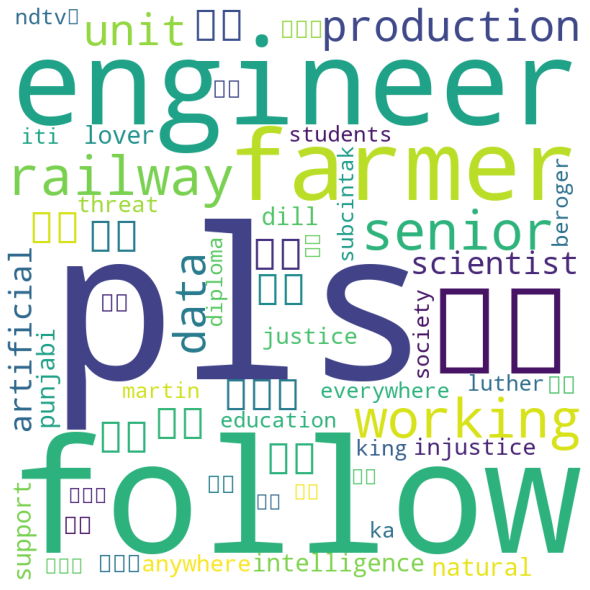

In [ ]:
get_hindi_wordcloud(top_10_users_ntweets)

this is the official account of rahul gandhi | member of the indian national congress| member of parliament breaking news alerts from india. instagram: youtube: aajtak covers breaking news, latest news in politics, sports, business & cinema. follow us & stay ahead! download the app: follow for latest news alerts from india the official twitter account of india's most vibrant political movement - the indian national congress ज़ी न्‍यूज हिंदी भाषी पाठकों के लिए पेश करता है बेहद सटीक, ताजा एवं विश्‍वसनीय खबरें। for english @zeenewsenglish सुनो सबकी,करो दिल की.मीडियाकर्मी.ट्वीट्स जानकारी और कई दफा व्यंग्य के लिए भी.rts दिल पर न लें.विचार और राय निजी,संस्थान के नहीं. ‘छर्रों’ को जवाब नहीं मिलेगा. chief minister of rajasthan latest news and updates from across the nation. co-founder - columnist, author; views personal, retweets not endorsement. 


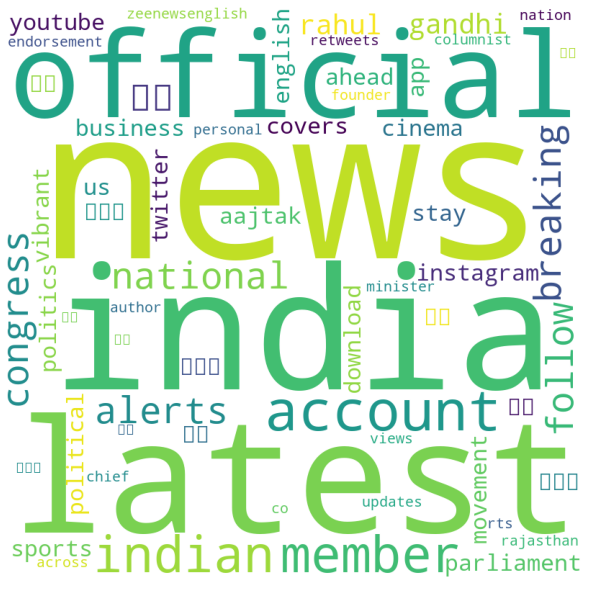

In [ ]:
get_hindi_wordcloud(top_10_users_nfollowers)